In [186]:


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, 
    accuracy_score, roc_auc_score, recall_score,
    precision_score, f1_score, classification_report, roc_curve)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall, Precision, AUC, Accuracy, FalseNegatives, FalsePositives, TrueNegatives, TruePositives
from scikeras.wrappers import KerasClassifier

import numpy as np
import pandas as pd
import seaborn as sns



# Binary Classification
---

## Baseline Model 

Logistic regression

---


In [187]:
df = pd.read_csv('../data/csv/model_input.csv')

In [158]:
# basic logistic regression
y = df['group_five']
X = df.drop(columns=['group_five', 'ar', 'group', 'group_mcl', 'X', 'Y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

# instantiate the model 
lr = LogisticRegression()

# fit the model
lr.fit(Z_train, y_train)

# generate predictions 
preds = lr.predict(Z_test).ravel()

# print additional model metrics
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       166
           1       0.00      0.00      0.00         3

    accuracy                           0.98       169
   macro avg       0.49      0.50      0.50       169
weighted avg       0.96      0.98      0.97       169



c:\Users\kendall\miniconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kendall\miniconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kendall\miniconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [204]:
model = Sequential()
model.add(Dense(32,
                input_shape=(18,),
                activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [205]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[TruePositives(),'accuracy'])

In [206]:
history = model.fit(Z_train, y_train, validation_data=(Z_test, y_test), epochs=30, batch_size=512, verbose=0)

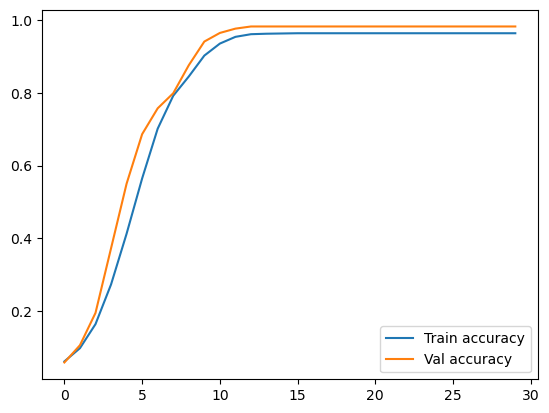

In [207]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

6/6 [==============================] - 0s 1ms/step


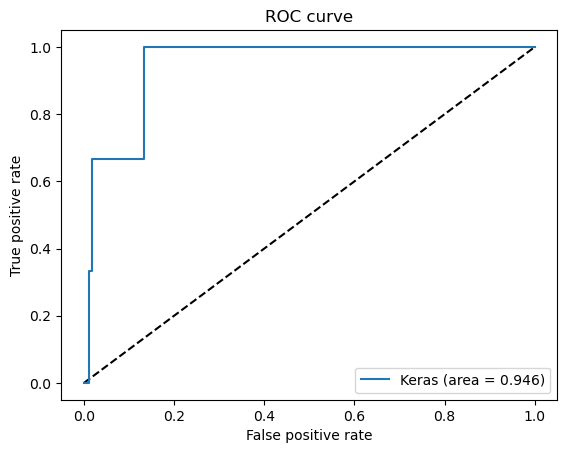

In [169]:
# check the auc plot 

y_pred_keras = model.predict(Z_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.show()